# Decision Trees

## Visualizing a Decision Tree

In [21]:
# Training a basic D-Tree CLF

import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[['petal length (cm)', 'petal width (cm)']].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [25]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)


In [5]:
# To visualize use graphviz
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file='iris_tree.dot',
    feature_names=['petal length (cm)', 'petal width (cm)'],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

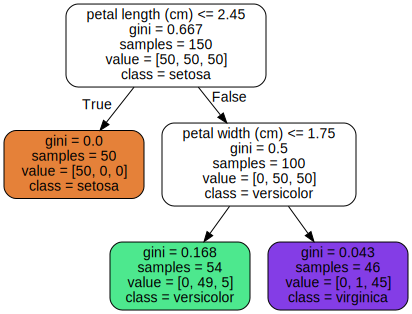

In [14]:
from graphviz import Source
Source.from_file('Graphviz_Files/iris_tree.dot')

# Top node is the root node and a split node. This is where you start in the decision process
# A split node is a node that splits into 2 posiable nodes based on the question at the top
# A leaf node is a node that doesn't ask any questions and has no child nodes

A major quality of D-Trees is that they don't require feature scaling or centering at all.

Decision trees are a white box model which means that there decisions are easy to interpert. You can see why they make certain decisions and is easy to follow unlike a Neural Network.

## CART Training Algorithm

Classification and Regression Tree(CART)

## Regularization Hyperparameters

D-Trees should always have some type of Regularization because they don't make assumptions about data(like linear models make assumption that data is linear) so if unconstrained, D-Trees will most likely overfit.

### Parameters for D-Trees in Scikit-learn
- max_depth - Controls the maximum depth of the decision tree. Default = None which means unlimited
- max_features - Maximum number of features that are evaluated for splitting at each node
- max_leaf_nodes - Maximum number of leaf nodes
- min_samples_split - Minimum number of samples a node must have before it can be split
- min_samples_leaf - Minimum number of samples a leaf node must have to be created
- min_weight_fraction_leaf - Same as min_samples_leaf but expressed as a fraction of the total number of weighted instances

Increasing min_* or reducing max_* hyperparameters will regularize the model.

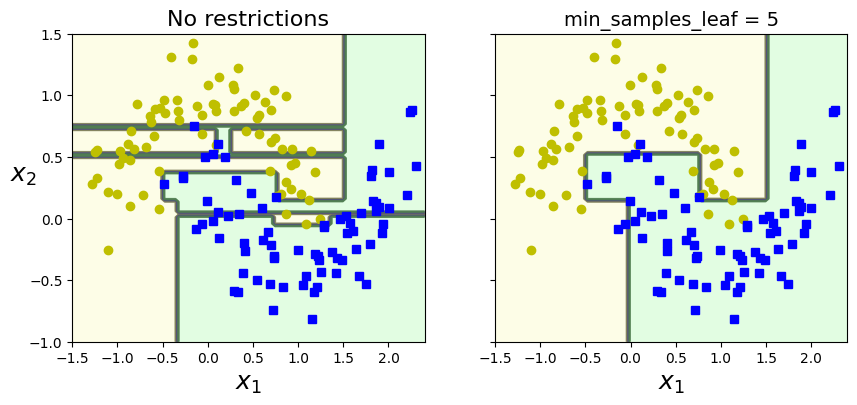

In [29]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42) # Model with no regularization
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42) # Model with some regularization
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()

In [30]:
# Test models
Xm_test, ym_test = make_moons(n_samples=1000, noise=0.2, random_state=43)

print(tree_clf1.score(Xm_test, ym_test))
print(tree_clf2.score(Xm_test, ym_test))

0.898
0.92


## Regression

In [35]:
# Test DTRegressor using a noisy quadratic dataset
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5 # A single input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

export_graphviz(
    tree_reg,
    out_file='Graphviz_Files/quad_reg.dot',
    feature_names=['x1'],
    rounded=True,
    filled=True
)

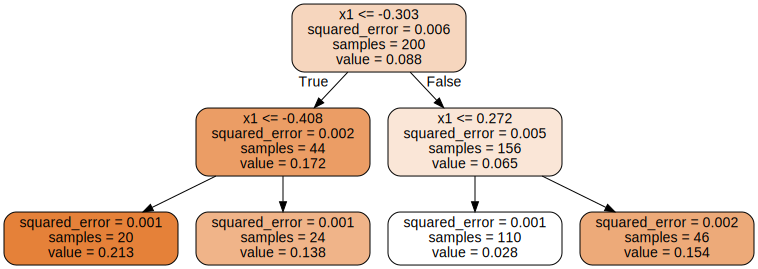

In [36]:
Source.from_file('Graphviz_Files/quad_reg.dot')